In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import r2_score
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LSTM
from tensorflow.keras import optimizers
from array import array



In [43]:
data = pd.read_excel('plot.xlsx')

In [23]:
data

,дата,реальные значения,"SARIMA(1,1,1,12)",MLP150,MLP60-90-60,CNN,LSTM,дата 2023
0,2022-01,1.184358,1.268757,0.941152,1.258712,0.845250,1.825578,2023-01
1,2022-02,0.699724,1.352497,1.359981,1.105538,1.334061,1.992349,2023-02
2,2022-03,2.128165,1.320402,2.157108,1.290723,1.665498,1.417565,2023-03
3,2022-04,1.010174,1.545578,1.375109,1.281294,0.764654,0.699161,2023-04
4,2022-05,0.839705,1.012882,0.993605,1.345140,1.105619,0.928551,2023-05
5,2022-06,0.987574,1.001183,0.854934,1.247017,1.120996,0.932692,2023-06
6,2022-07,1.256463,1.280418,1.271932,1.336974,1.411667,1.173242,2023-07
7,2022-08,1.443810,1.504637,1.753460,1.474319,1.214214,1.119194,2023-08
8,2022-09,1.292349,1.350461,1.325451,1.210303,1.234100,1.090990,2023-09
9,2022-10,1.444631,1.529471,1.564654,1.300040,1.450678,1.248877,2023-10


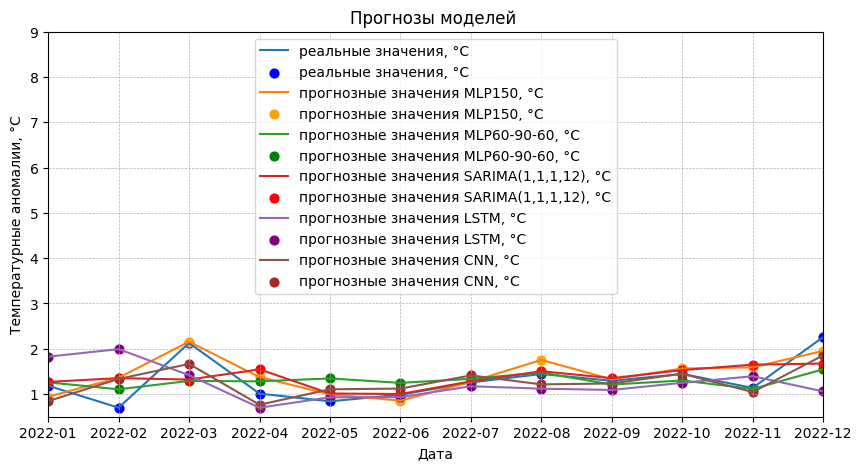

In [40]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.plot(data['дата'], data['реальные значения'])
plt.scatter(data['дата'], data['реальные значения'], color='blue', s=40, marker='o')
plt.title('Прогнозы моделей ')
plt.xlabel('Дата')
plt.ylabel('Температурные аномалии, °С')

plt.grid(linestyle = '--', linewidth = 0.5)
plt.plot(data['дата'], data['MLP150'])
plt.scatter(data['дата'],data['MLP150'], color='orange', s=40, marker='o')

plt.plot(data['дата'], data['MLP60-90-60'])
plt.scatter(data['дата'],data['MLP60-90-60'], color='green', s=40, marker='o')

plt.plot(data['дата'], data['SARIMA(1,1,1,12)'])
plt.scatter(data['дата'],data['SARIMA(1,1,1,12)'], color='red', s=40, marker='o')

plt.plot(data['дата'], data['LSTM'])
plt.scatter(data['дата'],data['LSTM'], color='purple', s=40, marker='o')

plt.plot(data['дата'], data['CNN'])
plt.scatter(data['дата'],data['CNN'], color='brown', s=40, marker='o')

plt.legend(('реальные значения, °С','реальные значения, °С',
            'прогнозные значения MLP150, °С','прогнозные значения MLP150, °С',
            'прогнозные значения MLP60-90-60, °С','прогнозные значения MLP60-90-60, °С'
            ,'прогнозные значения SARIMA(1,1,1,12), °С','прогнозные значения SARIMA(1,1,1,12), °С',
            'прогнозные значения LSTM, °С','прогнозные значения LSTM, °С',
            'прогнозные значения CNN, °С','прогнозные значения CNN, °С'), loc='upper center')
              
plt.axis([data['дата'].min(), data['дата'].max(), 0.5, 9])
plt.show()

In [26]:
m1 = tf.keras.models.load_model('model_MLP на вход 24 месяцев 150 нейронов, 3000 эпох, 0.0005 лерниг, 0.5577618950870985 r2.keras')
m2 = tf.keras.models.load_model('model_CNN без пулинга, 3 фильтры, 1000 слой, 1000 эпох, 3 ядро, 0.5364160319047839 r2, mse 0.09426682452240404.keras')

In [27]:
# Данные последних 24 месяцев для прогноза на 2023 год
test_list = [[2.037562, 0.938128, 0.501127, 1.836998, 0.891449, 0.841669,
        1.131394, 1.255948, 0.922805, 1.532938, 1.217016, 1.18089,
    1.184358,
 0.699724,
 2.128165,
 1.010174,
 0.839705,
 0.987574,
 1.256463,
 1.44381,
 1.292349,
 1.444631,
 1.136599,
 2.257799]]
x_input = np.array(test_list)

In [29]:
m1.predict(x_input, verbose=0)

array([[1.2361578, 0.9000961, 0.7925303, 1.367768 , 0.7710363, 1.1411841,
        1.502764 , 1.3337412, 1.7084044, 1.3738985, 1.0658548, 1.4774646]],
      dtype=float32)

In [30]:
m2.predict(x_input, verbose=0)


array([[1.193466 , 1.031185 , 0.6976167, 1.1464328, 1.316934 , 0.7944048,
        1.0964013, 1.1758034, 1.3754277, 1.5179733, 1.5739226, 1.6845838]],
      dtype=float32)

In [62]:
df = pd.read_excel('predict.xlsx')

In [63]:
df

,дата,реальные данные,MLP,CNN
0,2022-01-01,1.184358,0.941152,0.845250
1,2022-02-01,0.699724,1.359981,1.334061
2,2022-03-01,2.128165,2.157108,1.665498
3,2022-04-01,1.010174,1.375109,0.764654
4,2022-05-01,0.839705,0.993605,1.105619
5,2022-06-01,0.987574,0.854934,1.120996
6,2022-07-01,1.256463,1.271932,1.411667
7,2022-08-01,1.443810,1.753460,1.214214
8,2022-09-01,1.292349,1.325451,1.234100
9,2022-10-01,1.444631,1.564654,1.450678


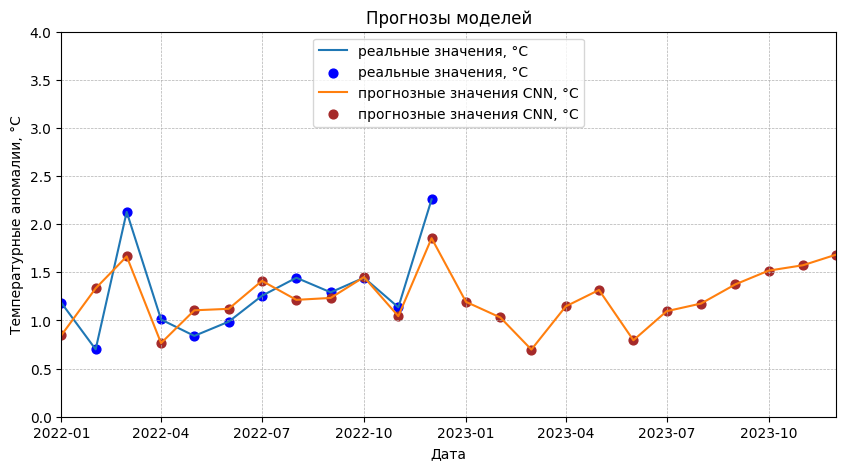

In [66]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.plot(df['дата'], df['реальные данные'])
plt.scatter(df['дата'], df['реальные данные'], color='blue', s=40, marker='o')
plt.title('Прогнозы моделей')
plt.xlabel('Дата')
plt.ylabel('Температурные аномалии, °С')

plt.grid(linestyle = '--', linewidth = 0.5)
# plt.plot(df['дата'], df['MLP'])
# plt.scatter(df['дата'],df['MLP'], color='orange', s=40, marker='o')

plt.plot(df['дата'], df['CNN'])
plt.scatter(df['дата'],df['CNN'], color='brown', s=40, marker='o')

plt.legend(('реальные значения, °С','реальные значения, °С',
            # 'прогнозные значения MLP150, °С','прогнозные значения MLP, °С',
            'прогнозные значения CNN, °С','прогнозные значения CNN, °С'), loc='upper center')
              
plt.axis([df['дата'].min(), df['дата'].max(), 0, 4])
plt.show()